In [1]:
from PIL import Image
from torchvision.transforms.functional import to_pil_image
from torchvision import transforms
from glob import glob 
import numpy as np
import pixmix_utils as utils
import torch
from input_transform import *

%load_ext autoreload
%autoreload 2

transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(256)
        ]) 

mixing_set  = glob('./__assets__/pixmix_samples/feature_vis/*')
mixing_set2 = glob('./__assets__/pixmix_samples/fractals/*')
image = Image.open('./ex.JPEG')
image = image.resize((256, 256), Image.Resampling.LANCZOS)
image = transform(image)


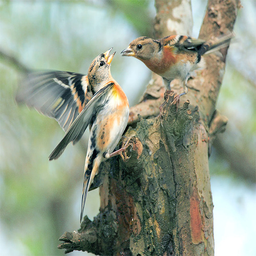

In [22]:
image

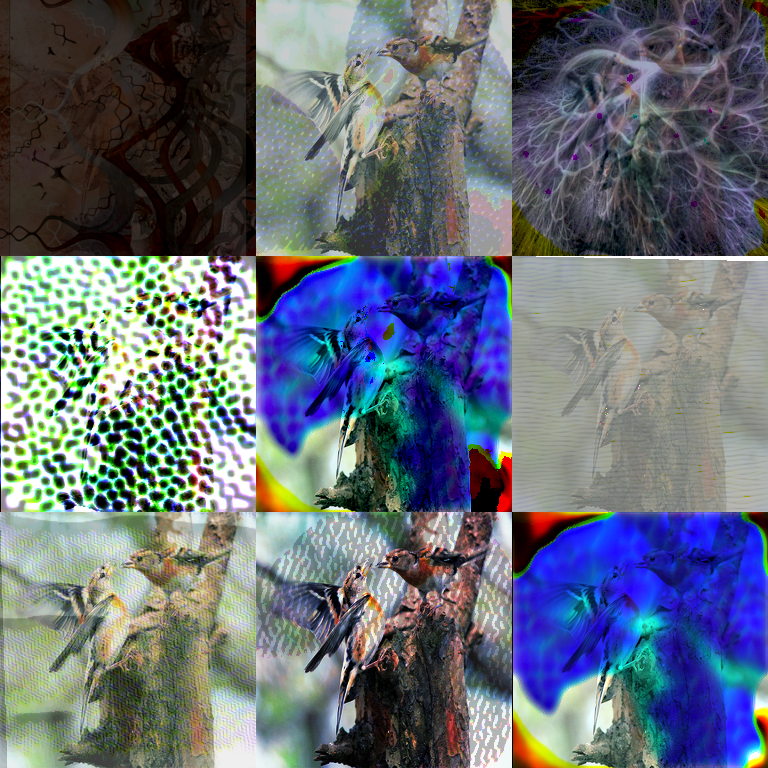

In [21]:

def concat_images(images, size, shape=None, width=256, height=256):    
    # Create canvas for the final image with total size
    shape = shape if shape else (1, len(images))
    image_size = (width * shape[1], height * shape[0])
    image = Image.new('RGB', image_size)
    # Paste images into final image
    for row in range(shape[0]):
        for col in range(shape[1]):
            offset = width * col, height * row
            idx = row * shape[1] + col
            image.paste(images[idx], offset)
    
    return image


images = []
for _ in range(9):
    rnd_idx = np.random.choice(len(mixing_set))
    rnd_idx2 = np.random.choice(len(mixing_set2))
    image_mix = transform(Image.open(mixing_set[rnd_idx]))
    image_mix2 = transform(Image.open(mixing_set2[rnd_idx2]))
    images.append(to_pil_image(pixmix(image, image_mix, image_mix2, {'tensorize':transforms.ToTensor()}))) # for _ in range(9)]
concat_images(images, (256, 256), (3, 3))